In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/Users/palakdeep/Desktop/Probation/Probation-Project-25/Palakdeep_kaur_task_7/Fuel_consumption.csv")
df

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [3]:
df.isnull().sum()

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64

In [4]:
df.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


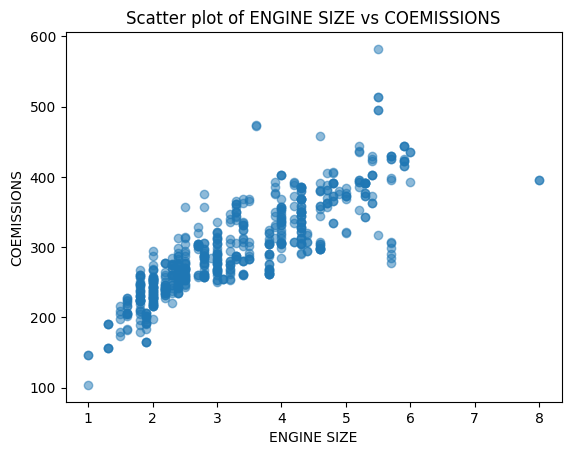

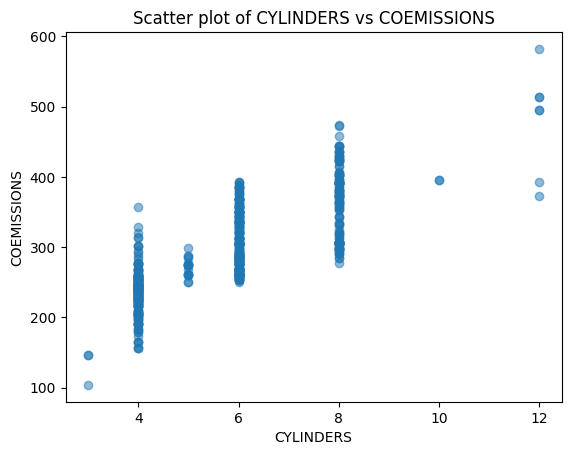

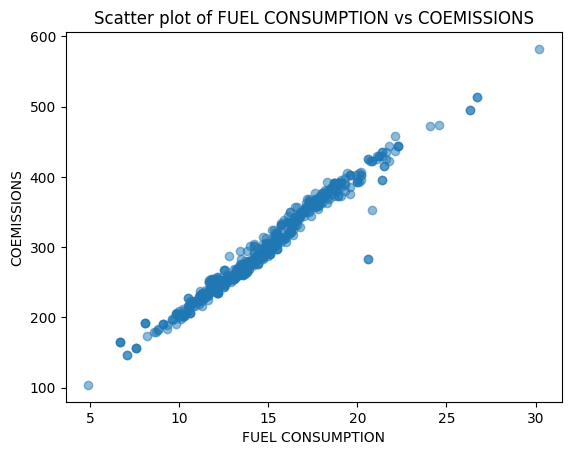

In [5]:
col=["ENGINE SIZE","CYLINDERS","FUEL CONSUMPTION"]
for i in col:
    plt.scatter(df[i],df["COEMISSIONS"],alpha=0.5)
    plt.title(f"Scatter plot of {i} vs COEMISSIONS")
    plt.xlabel(i)
    plt.ylabel("COEMISSIONS")
    plt.show()

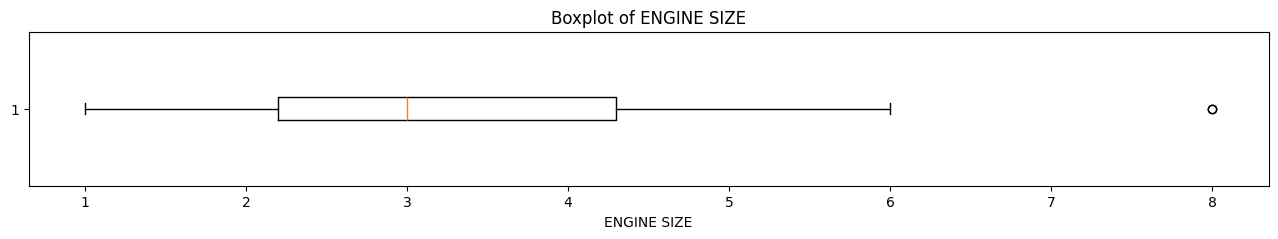

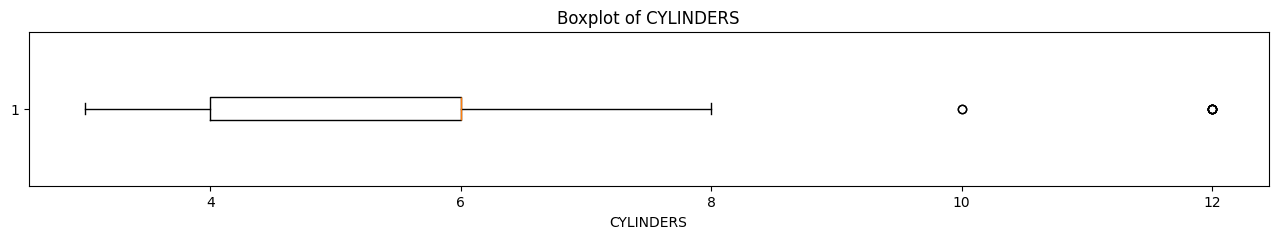

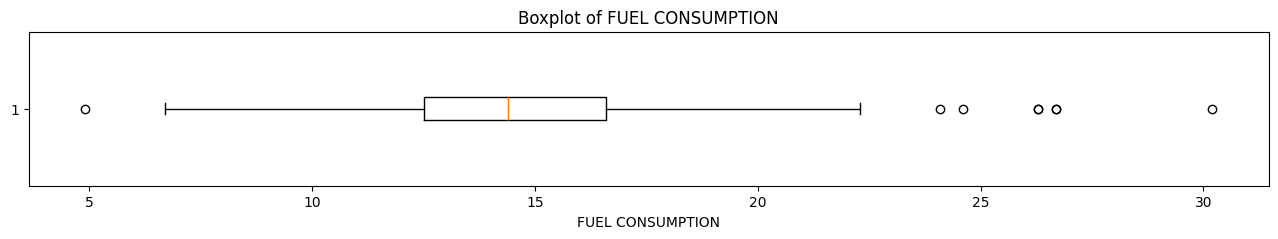

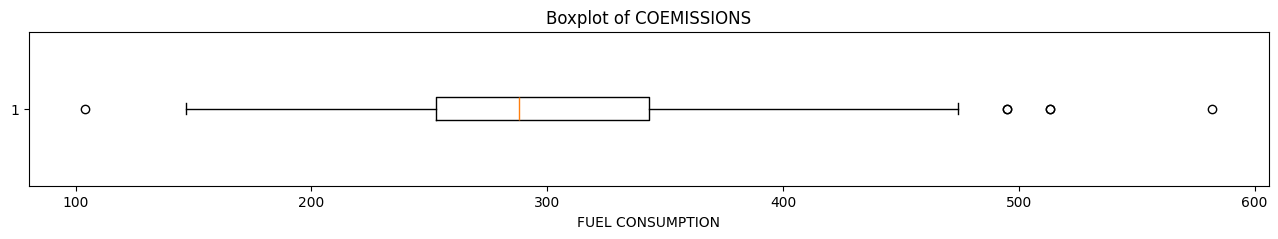

In [6]:
for i in col:
    plt.figure(figsize=(16,2))
    plt.boxplot(df[i], vert=False)
    plt.title(f"Boxplot of {i}")
    plt.xlabel(i)
    plt.show()
plt.figure(figsize=(16,2))
plt.boxplot(df['COEMISSIONS'], vert=False)
plt.title("Boxplot of COEMISSIONS")
plt.xlabel(i)
plt.show()

<Axes: >

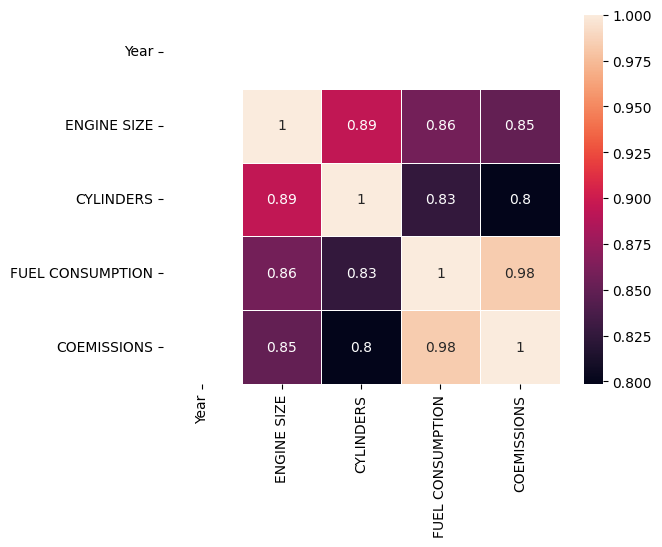

In [7]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, linewidths=0.5)


In [21]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [1,2,3,6,7])],
    remainder='passthrough'
)

X = ct.fit_transform(X)

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
prediction=regressor.predict(X)
prediction

array([217.41349335, 203.58795013, 264.99865827, 301.00011907,
       232.29532615, 216.7061074 , 223.00021025, 305.87534066,
       306.12523023, 253.96727764, 221.84185634, 284.1302896 ,
       259.05957045, 271.14466554, 244.31027085, 294.25297535,
       283.2916605 , 293.99985343, 306.00003776, 304.5386499 ,
       300.27013221, 308.42833326, 293.93966734, 311.82186572,
       308.00016661, 306.13415067, 301.86563298, 260.00027807,
       260.00117853, 246.00037294, 260.00115043, 292.86245067,
       280.13746029, 271.7442471 , 257.25558118, 271.7442471 ,
       257.25558118, 274.1260904 , 257.87374894, 274.1260904 ,
       257.87374894, 287.84915425, 258.15053119, 288.12185224,
       284.87836226, 292.64300463, 318.35697109, 320.00111113,
       307.99935342, 307.99924981, 373.00017242, 280.99977754,
       280.99980563, 374.99939432, 293.99991307, 278.97377682,
       266.91190915, 278.29709812, 276.81728368, 380.00009781,
       255.0004669 , 264.99992421, 275.99983638, 289.99

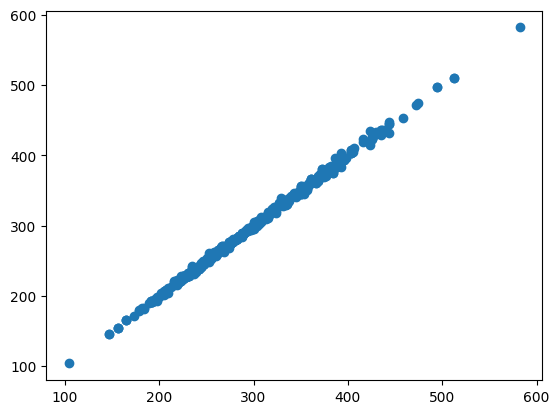

In [27]:
plt.scatter(y,prediction)
plt.show()

In [28]:
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

Intercept: 3.6741876552204076
Coefficients: [ 1.92472905e+00 -4.81893360e-02 -2.80904344e-01 -7.78533685e+00
 -4.63610220e+00 -8.96153149e-01 -6.92289608e-01 -2.84838151e+00
 -7.10851349e+00  1.09176925e+01 -1.53976995e+00  1.67070434e+00
  7.96022276e-01 -1.16803549e+00  1.39652235e+00  3.40703100e-01
  2.40328405e+00 -1.49783035e+00  6.34672465e+00  5.69783256e+00
  2.46076944e+00 -6.58883690e-01  2.09383260e+00  6.35443191e-01
  3.85864171e+00 -4.35330545e+00  1.54655550e+00 -6.64595615e+00
 -6.82657287e-01  5.13435171e-01 -5.88790172e+00 -9.65431981e-01
 -2.50290171e-01 -1.69965743e-01  5.61558892e+00 -1.02582904e-01
  1.69174304e+00 -5.47101302e+00  3.59902498e-01  9.67190225e-01
  4.84435941e+00 -2.16443986e+00 -2.16443986e+00 -2.63326893e+00
 -2.63326893e+00  5.06801228e+00 -3.19338177e+00 -3.19338177e+00
  4.24468174e+00 -2.35648668e+00 -4.11136269e+00 -5.80280490e-01
  1.06408477e+01  1.22364437e+01  3.74414962e+00  3.79242539e+00
  4.36001977e+00  7.36721463e+00  2.11688950e+

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y,prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y,prediction)
r2 = r2_score(y,prediction)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 1.6021
MSE: 6.2184
RMSE: 2.4937
R² Score: 0.9985


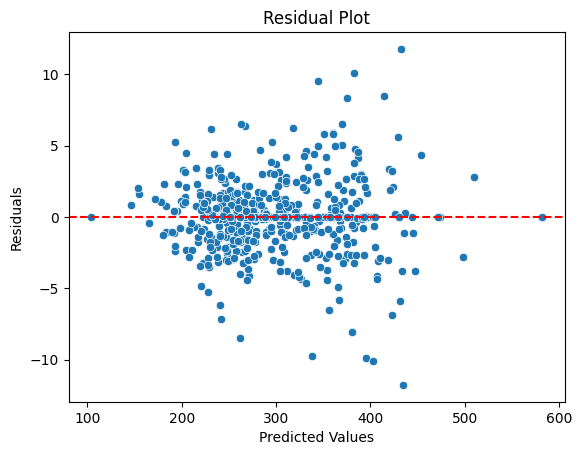

In [34]:
residuals = y - prediction
sns.scatterplot(x=prediction, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()